In [31]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from glob import glob
import IPython.display as ipd
from tqdm.notebook import tqdm

import cv2

In [32]:
files = sorted(os.listdir('/kaggle/input/s1-datasetvideos/s1')) # preserving the original order

In [33]:
# displaying a sample
ipd.Video('/kaggle/input/s1-datasetvideos/s1'+ files[0], width = 900, height = 500, embed = True)

In [34]:
# function to retrieve meta data
# information pertaining to pos, brightness, saturation, contrast, hue etc were returing 0's due to various reasons like unsupported video formats, pre recorded videos etc.
def get_meta_data(file_name):
    path = '/kaggle/input/s1-datasetvideos/s1/' + file_name
    storage_size = os.path.getsize(path) / 1048576 # mbs in bytes
    video = cv2.VideoCapture(path)
    height = video.get(cv2.CAP_PROP_FRAME_HEIGHT) # to get frame height
    width =  video.get(cv2.CAP_PROP_FRAME_WIDTH) # to get frame width
    FPS = video.get(cv2.CAP_PROP_FPS) # frames per sec
    total_frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT) # total number of frame count in the video (not per sec).
#     frame_pos = video.get(cv2.CAP_PROP_POS_FRAMES) # Get the current frame position.
    duration = total_frame_count/FPS
#     brightness = video.get(cv2.CAP_PROP_BRIGHTNESS) # to get the brightness of the video
#     contrast = video.get(cv2.CAP_PROP_CONTRAST) # to get the contrast of the video
#     saturation = video.get(cv2.CAP_PROP_SATURATION) # saturation of the video
#     hue = video.get(cv2.CAP_PROP_HUE) # Hue of the current video
    video.release()
    # binding in a dictionary 
    meta_data = {
        'storage_size': storage_size,
        'height': height,
        'widht': width,
        'FPS': FPS,
        'total_frame_count': total_frame_count,
#         'frame_pos': frame_pos,
        'duration': duration,
#         'brightness': brightness,
#         'contrast': contrast,
#         'saturation': saturation,
#         'hue': hue
    }
    
    return meta_data

In [35]:
# getting the dataframe ready
meta_data_list = []
for file in files:
    meta_data_list.append(get_meta_data(file))
    
df = pd.DataFrame(meta_data_list)

In [36]:
df

,storage_size,height,widht,FPS,total_frame_count,duration
0,0.431641,288.0,360.0,25.0,75.0,3.0
1,0.417969,288.0,360.0,25.0,75.0,3.0
2,0.410156,288.0,360.0,25.0,75.0,3.0
3,0.425781,288.0,360.0,25.0,75.0,3.0
4,0.408203,288.0,360.0,25.0,75.0,3.0
...,...,...,...,...,...,...
995,0.412109,288.0,360.0,25.0,75.0,3.0
996,0.392578,288.0,360.0,25.0,75.0,3.0
997,0.386719,288.0,360.0,25.0,75.0,3.0
998,0.394531,288.0,360.0,25.0,75.0,3.0


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
storage_size,1000.0,0.411369,0.018126,0.380859,0.398438,0.408203,0.417969,0.466797
height,1000.0,288.000000,0.000000,288.000000,288.000000,288.000000,288.000000,288.000000
widht,1000.0,360.000000,0.000000,360.000000,360.000000,360.000000,360.000000,360.000000
FPS,1000.0,25.000000,0.000000,25.000000,25.000000,25.000000,25.000000,25.000000
total_frame_count,1000.0,74.995000,0.070569,74.000000,75.000000,75.000000,75.000000,75.000000
duration,1000.0,2.999800,0.002823,2.960000,3.000000,3.000000,3.000000,3.000000


In [38]:
print(df.isnull().sum().any()) # no null values, all the videos got read into 

False


# To check the stability and consistency of the data

In [39]:
# making sure if there are any videos that got read more than once
df[df.duplicated()]

# this means most of the videos hold similar to almost same meta properties, we can further confirm this with plots

,storage_size,height,widht,FPS,total_frame_count,duration
7,0.392578,288.0,360.0,25.0,75.0,3.0
12,0.417969,288.0,360.0,25.0,75.0,3.0
15,0.392578,288.0,360.0,25.0,75.0,3.0
16,0.408203,288.0,360.0,25.0,75.0,3.0
22,0.388672,288.0,360.0,25.0,75.0,3.0
...,...,...,...,...,...,...
995,0.412109,288.0,360.0,25.0,75.0,3.0
996,0.392578,288.0,360.0,25.0,75.0,3.0
997,0.386719,288.0,360.0,25.0,75.0,3.0
998,0.394531,288.0,360.0,25.0,75.0,3.0


## Duration Analysis 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


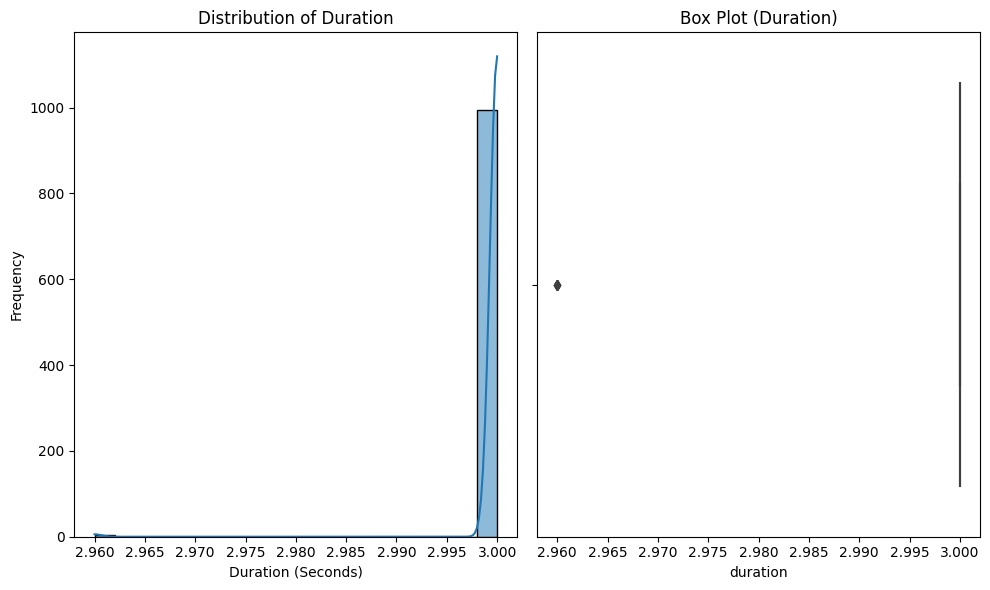

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))


sns.histplot(x=df['duration'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Duration')
axs[0].set_xlabel('Duration (Seconds)')
axs[0].set_ylabel('Frequency')


sns.boxplot(x=df['duration'], ax=axs[1])
axs[1].set_title('Box Plot (Duration)')


plt.tight_layout()
plt.show()

In [41]:
df.query('duration != 3.0')

,storage_size,height,widht,FPS,total_frame_count,duration
363,0.400391,288.0,360.0,25.0,74.0,2.96
763,0.419922,288.0,360.0,25.0,74.0,2.96
888,0.410156,288.0,360.0,25.0,74.0,2.96
927,0.408203,288.0,360.0,25.0,74.0,2.96
947,0.392578,288.0,360.0,25.0,74.0,2.96


In [42]:
df.query('total_frame_count == 74.0')

,storage_size,height,widht,FPS,total_frame_count,duration
363,0.400391,288.0,360.0,25.0,74.0,2.96
763,0.419922,288.0,360.0,25.0,74.0,2.96
888,0.410156,288.0,360.0,25.0,74.0,2.96
927,0.408203,288.0,360.0,25.0,74.0,2.96
947,0.392578,288.0,360.0,25.0,74.0,2.96


***this shows that frame rate and duration consistency remains true. it is not the case where frame rate or FPS changes due to long or short duration times.***

## Resolution Consistency?


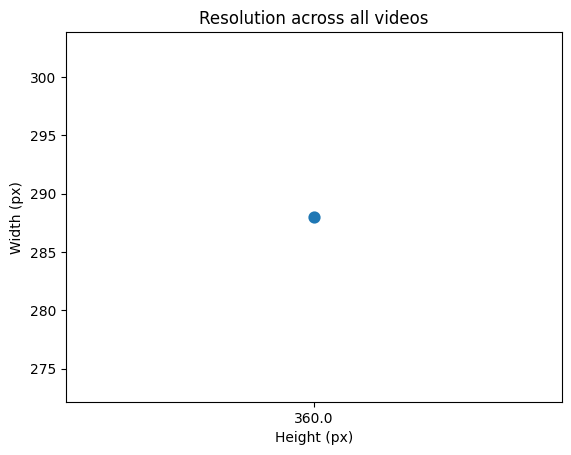

In [43]:
sns.pointplot(x = df['widht'], y = df['height'])
plt.title('Resolution across all videos')
plt.xlabel('Height (px)')
plt.ylabel('Width (px)')

plt.show()

### Portrait (4:5): 288 x 360

A portrait resolution like this is often used in social media posts, mobile devices, or portrait photography, where the display is taller than it is wide.

##  Storage size vs Duration and total_frames

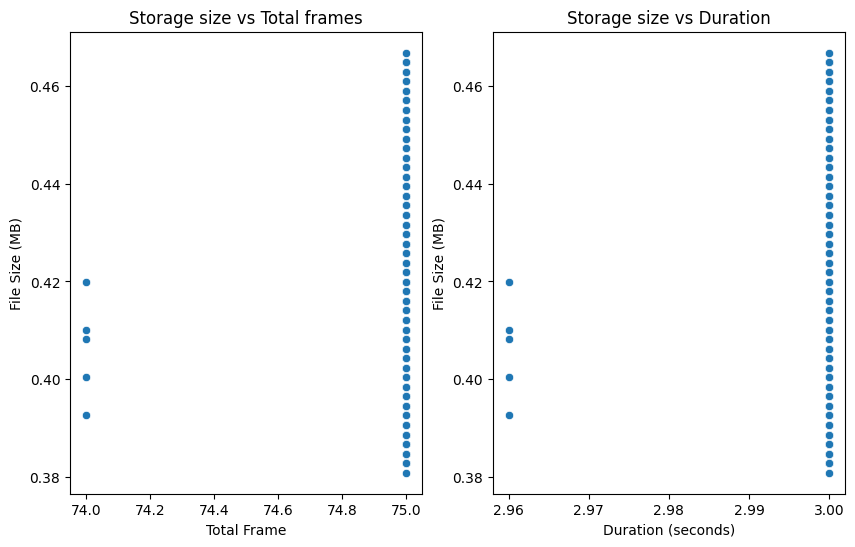

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))


sns.scatterplot(y = df['storage_size'],x = df['total_frame_count'], ax = axs[0])
axs[0].set_title('Storage size vs Total frames')
axs[0].set_xlabel('Total Frame')
axs[0].set_ylabel('File Size (MB)')


sns.scatterplot(y = df['storage_size'],x = df['duration'], ax = axs[1])
axs[1].set_title('Storage size vs Duration')
axs[1].set_xlabel('Duration (seconds)')
axs[1].set_ylabel('File Size (MB)')

plt.show()

## Frame Rate Consistency 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


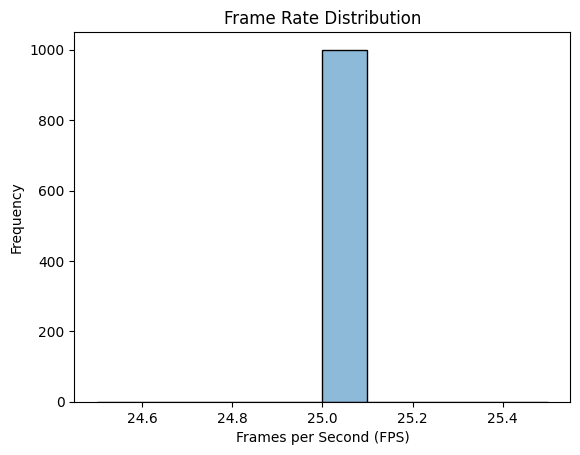

In [45]:
sns.histplot(df['FPS'], bins=10, kde=True)
plt.title('Frame Rate Distribution')
plt.xlabel('Frames per Second (FPS)')
plt.ylabel('Frequency')
plt.show()

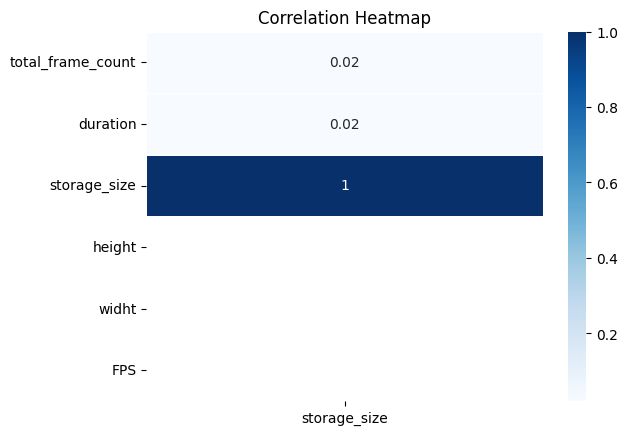

In [56]:
corr_matrix = df.corr()[['storage_size']].sort_values(by = 'storage_size',ascending=True)
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Plot of sample video per frame count of 10frames

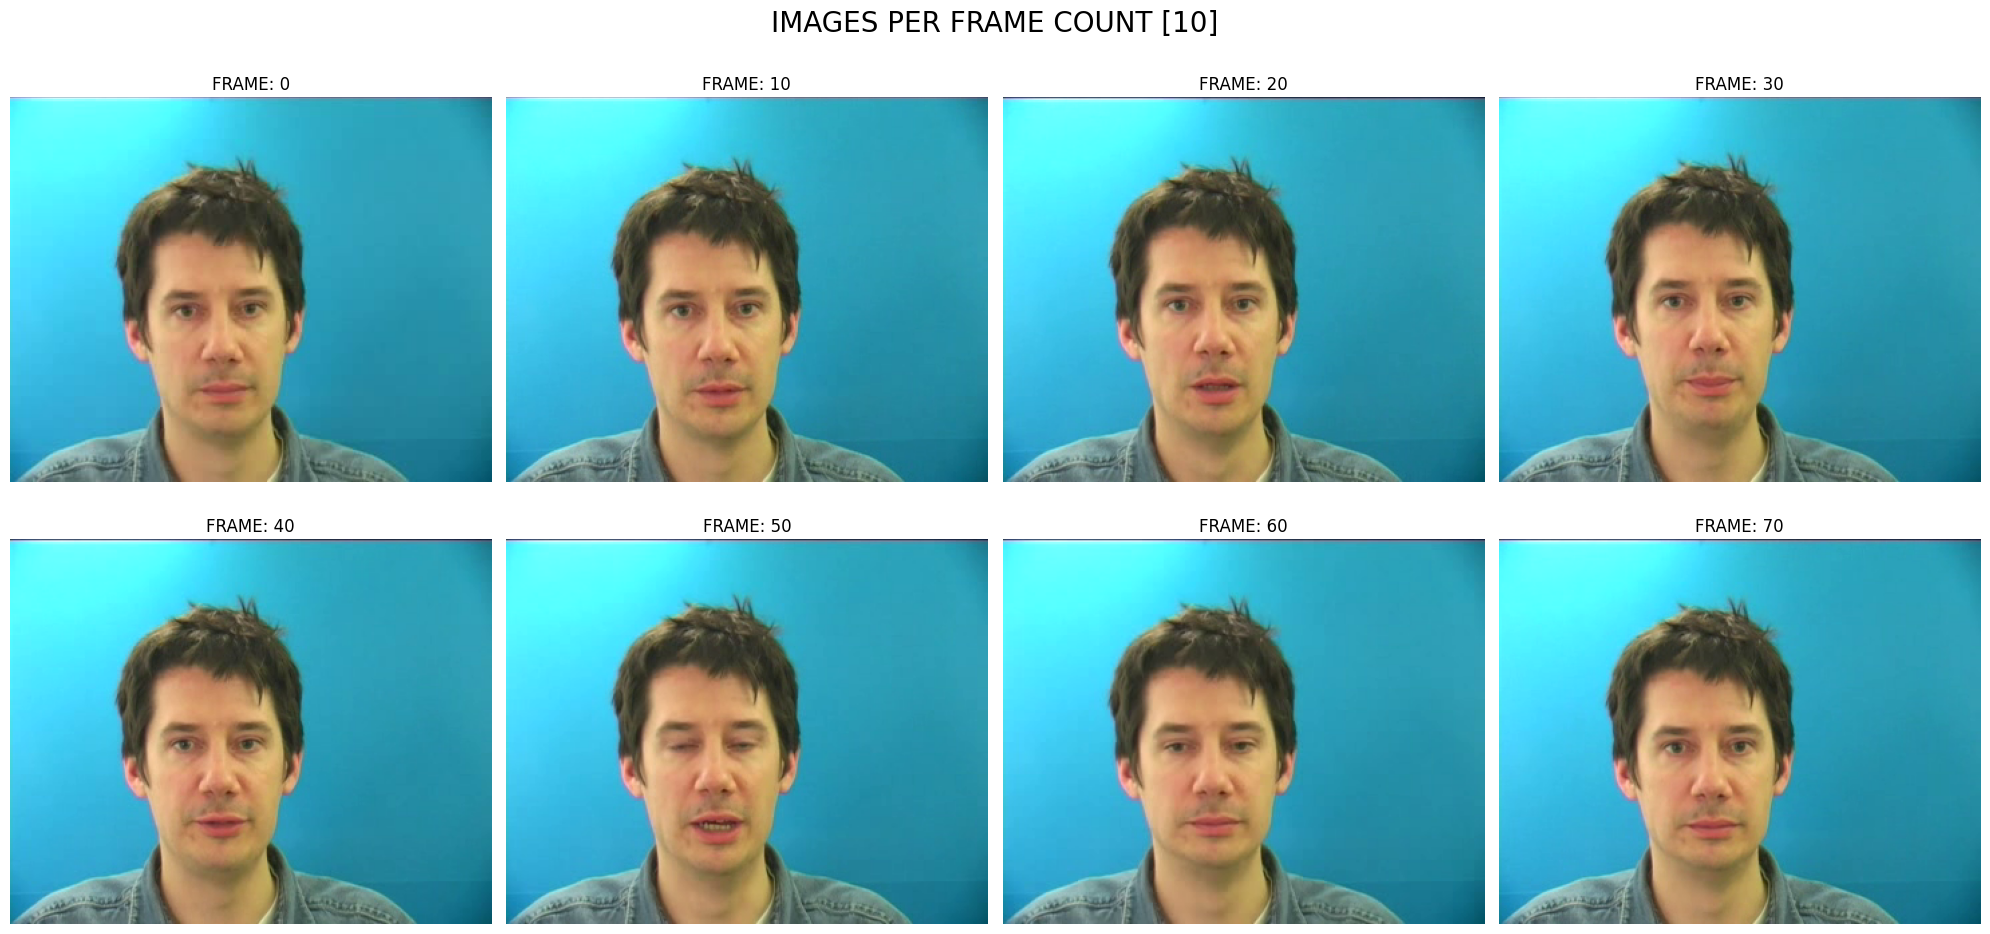

In [58]:
file_path = '/kaggle/input/s1-datasetvideos/s1/bbaf2n.mpg'

# create subplots 
fig, axs = plt.subplots(2, 4, figsize = (20, 10))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten() 

# Set the title for the entire figure
fig.suptitle('IMAGES PER FRAME COUNT [10]', fontsize = 20)

# create a new capture obj
video = cv2.VideoCapture(file_path)
n_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) # total number of frames

idx = 0
for frame in range(n_frames):
    ret, img = video.read()
    if ret == False: # reach the end of the video then break
        break
    if frame % 10 == 0:
        axs[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[idx].set_title(f'FRAME: {frame}')
        axs[idx].axis('off')
        idx += 1

plt.tight_layout()
plt.show()
video.release()

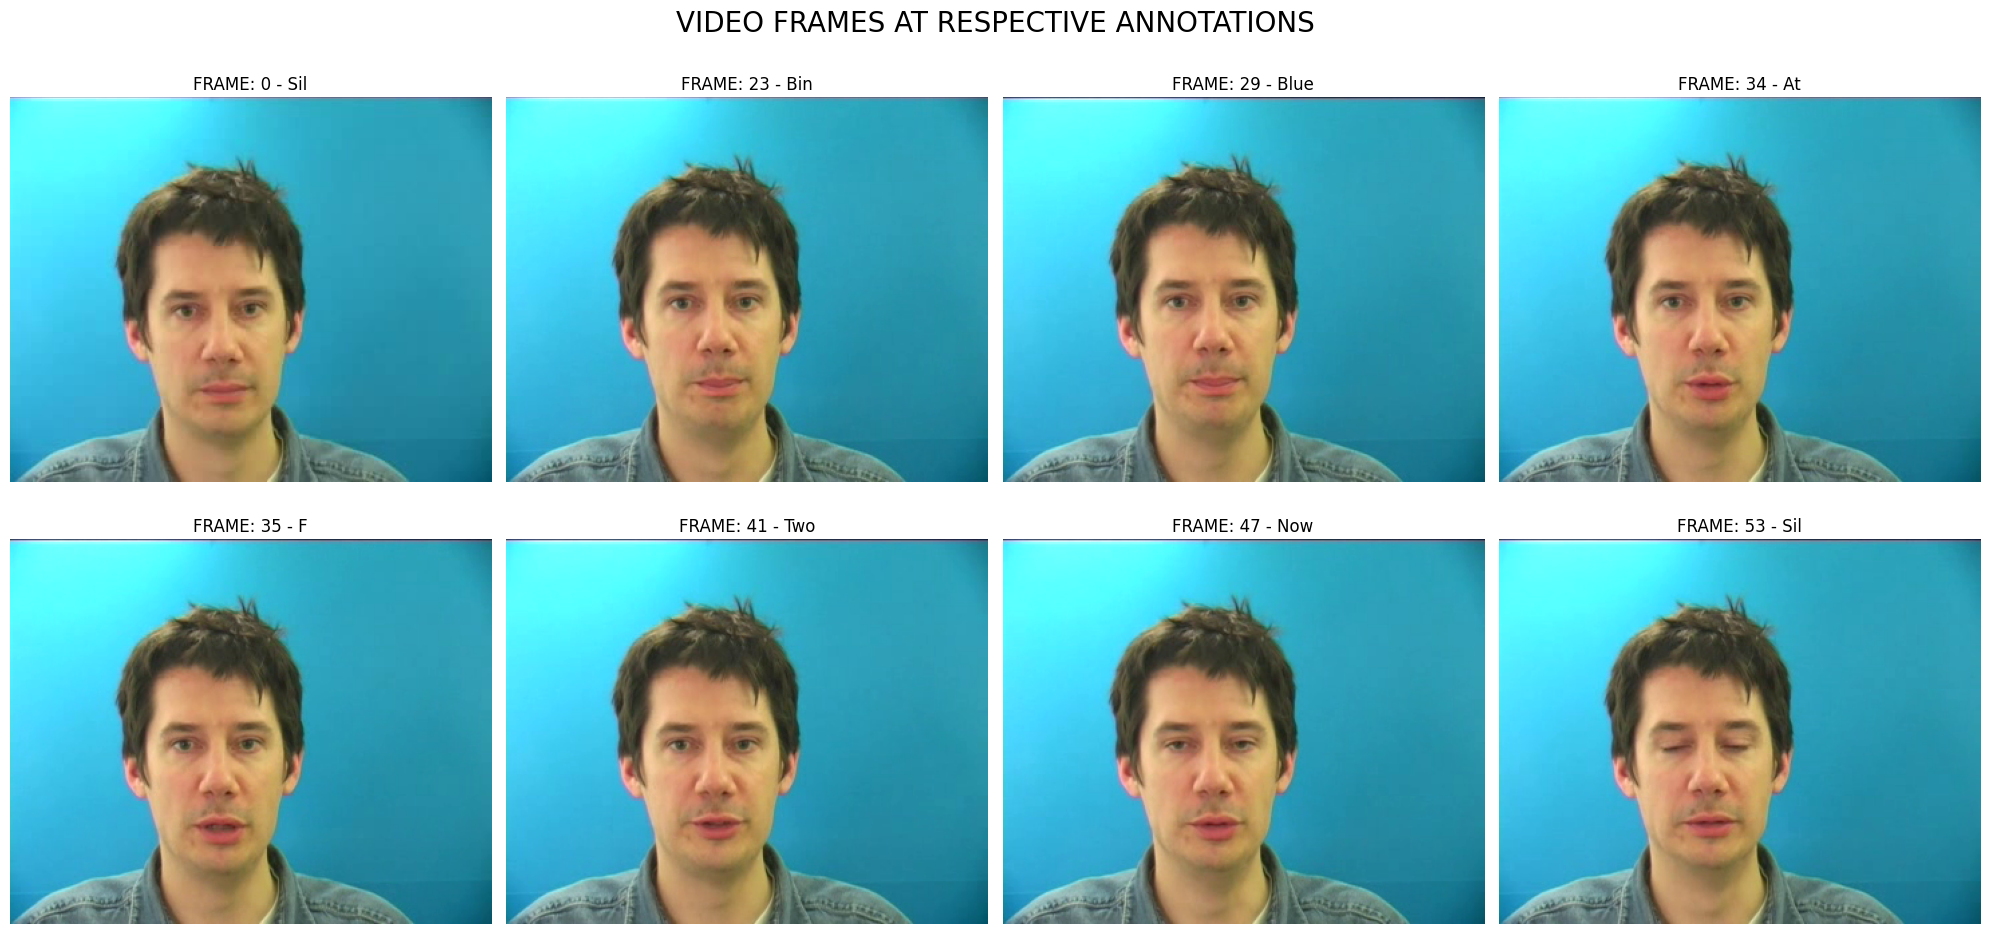

In [60]:
annot_frames = [0, 23, 29, 34, 35, 41, 47, 53]
annotations = ['Sil', 'Bin', 'Blue', 'At', 'F', 'Two', 'Now', 'Sil']


# create subplots 
fig, axs = plt.subplots(2, 4, figsize = (20, 10))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten() 

# Set the title for the entire figure
fig.suptitle('VIDEO FRAMES AT RESPECTIVE ANNOTATIONS', fontsize = 20)

# create a new capture obj
video = cv2.VideoCapture(file_path)
n_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) # total number of frames

idx = 0
for frame in range(n_frames):
    ret, img = video.read()
    if ret == False: # reach the end of the video then break
        break
    if frame in annot_frames:
        axs[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[idx].set_title(f'FRAME: {frame} - {annotations[idx]}')
        axs[idx].axis('off')
        idx += 1

plt.tight_layout()
plt.show()
video.release()